In [1]:
 %matplotlib inline

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
seed = 7
np.random.seed(seed)

/Users/judemurphy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv('/Users/judemurphy/Project Notebooks/100days_allfeatures_5minintervals.csv')
data.head()

timestamp  blood_glucose  rapid_acting_insulin  \
0  09/01/2018 00:00           12.0                   0.0   
1  09/01/2018 00:05           11.9                   0.0   
2  09/01/2018 00:10           11.7                   0.0   
3  09/01/2018 00:15           11.3                   0.0   
4  09/01/2018 00:20           10.8                   0.0   

   carbohydrates_consumed  protein_consumed  fat_consumed  \
0                     0.0               0.0           0.0   
1                     0.0               0.0           0.0   
2                     0.0               0.0           0.0   
3                     0.0               0.0           0.0   
4                     0.0               0.0           0.0   

   long_acting_insulin  asleep_awake  active_inactive  
0                  0.0             0                0  
1                  0.0             0                0  
2                  0.0             0                0  
3                  0.0             0                0  
4                  0.0             0                0

In [3]:
data

timestamp  blood_glucose  rapid_acting_insulin  \
0      09/01/2018 00:00           12.0                   0.0   
1      09/01/2018 00:05           11.9                   0.0   
2      09/01/2018 00:10           11.7                   0.0   
3      09/01/2018 00:15           11.3                   0.0   
4      09/01/2018 00:20           10.8                   0.0   
5      09/01/2018 00:25           10.4                   0.0   
6      09/01/2018 00:30           10.3                   0.0   
7      09/01/2018 00:35           10.2                   0.0   
8      09/01/2018 00:40            8.9                   0.0   
9      09/01/2018 00:45            8.4                   0.0   
10     09/01/2018 00:50            8.0                   0.0   
11     09/01/2018 00:55            7.5                   0.0   
12     09/01/2018 01:00            6.3                   0.0   
13     09/01/2018 01:05            5.1                   0.0   
14     09/01/2018 01:10            4.3                   0.0   
15     09/01/2018 01:15            4.3                   0.0   
16     09/01/2018 01:20            4.3                   0.0   
17     09/01/2018 01:25            4.2                   0.0   
18     09/01/2018 01:30            4.2                   0.0   
19     09/01/2018 01:35            4.2                   0.0   
20     09/01/2018 01:40            4.2                   0.0   
21     09/01/2018 01:45            4.2                   0.0   
22     09/01/2018 01:50            4.1                   0.0   
23     09/01/2018 01:55            4.1                   0.0   
24     09/01/2018 02:00            4.1                   0.0   
25     09/01/2018 02:05            4.1                   0.0   
26     09/01/2018 02:10            4.0                   0.0   
27     09/01/2018 02:15            4.0                   0.0   
28     09/01/2018 02:20            4.0                   0.0   
29     09/01/2018 02:25            4.0                   0.0   
...                 ...            ...                   ...   
28770  12/09/2018 21:30           10.9                   0.0   
28771  12/09/2018 21:35           11.0                   0.0   
28772  12/09/2018 21:40           11.2                   0.0   
28773  12/09/2018 21:45           10.1                   0.0   
28774  12/09/2018 21:50           10.1                   0.0   
28775  12/09/2018 21:55           10.2                   0.0   
28776  12/09/2018 22:00            9.9                   0.0   
28777  12/09/2018 22:05            9.7                   0.0   
28778  12/09/2018 22:10            9.4                   4.0   
28779  12/09/2018 22:15            9.5                   0.0   
28780  12/09/2018 22:20            9.5                   0.0   
28781  12/09/2018 22:25            9.6                   0.0   
28782  12/09/2018 22:30            9.9                   0.0   
28783  12/09/2018 22:35           10.3                   0.0   
28784  12/09/2018 22:40           10.6                   0.0   
28785  12/09/2018 22:45           10.8                   0.0   
28786  12/09/2018 22:50           11.1                   0.0   
28787  12/09/2018 22:55           11.3                   0.0   
28788  12/09/2018 23:00           11.1                   0.0   
28789  12/09/2018 23:05           10.8                   0.0   
28790  12/09/2018 23:10           10.6                   0.0   
28791  12/09/2018 23:15            9.1                   0.0   
28792  12/09/2018 23:20            8.6                   0.0   
28793  12/09/2018 23:25            8.1                   0.0   
28794  12/09/2018 23:30            7.6                   0.0   
28795  12/09/2018 23:35            7.0                   0.0   
28796  12/09/2018 23:40            6.5                   0.0   
28797  12/09/2018 23:45            6.3                   0.0   
28798  12/09/2018 23:50            6.1                   0.0   
28799  12/09/2018 23:55            5.9                   0.0   

       carbohydrates_consumed  protein_consum

In [4]:
data.isna().any()

timestamp                 False
blood_glucose             False
rapid_acting_insulin      False
carbohydrates_consumed    False
protein_consumed          False
fat_consumed              False
long_acting_insulin       False
asleep_awake              False
active_inactive           False
dtype: bool

In [5]:
data.timestamp = pd.to_datetime(data.timestamp)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 9 columns):
timestamp                 28800 non-null datetime64[ns]
blood_glucose             28800 non-null float64
rapid_acting_insulin      28800 non-null float64
carbohydrates_consumed    28800 non-null float64
protein_consumed          28800 non-null float64
fat_consumed              28800 non-null float64
long_acting_insulin       28800 non-null float64
asleep_awake              28800 non-null int64
active_inactive           28800 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 2.0 MB


In [7]:
data = data.set_index('timestamp')

In [8]:
data

blood_glucose  rapid_acting_insulin  \
timestamp                                                  
2018-09-01 00:00:00           12.0                   0.0   
2018-09-01 00:05:00           11.9                   0.0   
2018-09-01 00:10:00           11.7                   0.0   
2018-09-01 00:15:00           11.3                   0.0   
2018-09-01 00:20:00           10.8                   0.0   
2018-09-01 00:25:00           10.4                   0.0   
2018-09-01 00:30:00           10.3                   0.0   
2018-09-01 00:35:00           10.2                   0.0   
2018-09-01 00:40:00            8.9                   0.0   
2018-09-01 00:45:00            8.4                   0.0   
2018-09-01 00:50:00            8.0                   0.0   
2018-09-01 00:55:00            7.5                   0.0   
2018-09-01 01:00:00            6.3                   0.0   
2018-09-01 01:05:00            5.1                   0.0   
2018-09-01 01:10:00            4.3                   0.0   
2018-09-01 01:15:00            4.3                   0.0   
2018-09-01 01:20:00            4.3                   0.0   
2018-09-01 01:25:00            4.2                   0.0   
2018-09-01 01:30:00            4.2                   0.0   
2018-09-01 01:35:00            4.2                   0.0   
2018-09-01 01:40:00            4.2                   0.0   
2018-09-01 01:45:00            4.2                   0.0   
2018-09-01 01:50:00            4.1                   0.0   
2018-09-01 01:55:00            4.1                   0.0   
2018-09-01 02:00:00            4.1                   0.0   
2018-09-01 02:05:00            4.1                   0.0   
2018-09-01 02:10:00            4.0                   0.0   
2018-09-01 02:15:00            4.0                   0.0   
2018-09-01 02:20:00            4.0                   0.0   
2018-09-01 02:25:00            4.0                   0.0   
...                            ...                   ...   
2018-12-09 21:30:00           10.9                   0.0   
2018-12-09 21:35:00           11.0                   0.0   
2018-12-09 21:40:00           11.2                   0.0   
2018-12-09 21:45:00           10.1                   0.0   
2018-12-09 21:50:00           10.1                   0.0   
2018-12-09 21:55:00           10.2                   0.0   
2018-12-09 22:00:00            9.9                   0.0   
2018-12-09 22:05:00            9.7                   0.0   
2018-12-09 22:10:00            9.4                   4.0   
2018-12-09 22:15:00            9.5                   0.0   
2018-12-09 22:20:00            9.5                   0.0   
2018-12-09 22:25:00            9.6                   0.0   
2018-12-09 22:30:00            9.9                   0.0   
2018-12-09 22:35:00           10.3                   0.0   
2018-12-09 22:40:00           10.6                   0.0   
2018-12-09 22:45:00           10.8                   0.0   
2018-12-09 22:50:00           11.1                   0.0   
2018-12-09 22:55:00           11.3                   0.0   
2018-12-09 23:00:00           11.1                   0.0   
2018-12-09 23:05:00           10.8                   0.0   
2018-12-09 23:10:00           10.6                   0.0   
2018-12-09 23:15:00            9.1                   0.0   
2018-12-09 23:20:00            8.6                   0.0   
2018-12-09 23:25:00            8.1                   0.0   
2018-12-09 23:30:00            7.6                   0.0   
2018-12-09 23:35:00            7.0                   0.0   
2018-12-09 23:40:00            6.5                   0.0   
2018-12-09 23:45:00            6.3                   0.0   
2018-12-09 23:50:00            6.1                   0.0   
2018-12-09 23:55:00            5.9                   0.0   

                     carbohydrates_consumed  protein_consumed  fat_consumed  \
timestamp                                                                     
2018-09-01 00:00:00                     0.0               0.0           0.0   
201

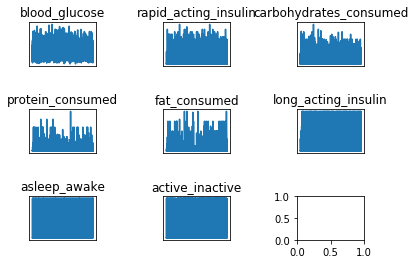

In [9]:
#Preparing the data to be modelled 
groups = [0, 1, 2, 3, 4, 5, 6, 7]
values = data.values
fig,sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=1, hspace=1)

for ax, i in zip(sub.flatten(),groups):
    ax.plot(values[:,i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(data.columns[i])

In [10]:
#Normalising data between range of 0 and 1 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled[0]

array([0.46969697, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [11]:
scaled

array([[0.46969697, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46464646, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45454545, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18181818, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.17171717, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16161616, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [12]:
#Representing the data as a supervised machine learning problem
#With the input values(X) being the 24 hours of feature data and the output(Y) being the blood glucose after 24hours
def to_supervised(data,dropNa = True,lag = 1):
    df = pd.DataFrame(data)
    column = []
    column.append(df)
    for i in range(1,lag+1):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    df.dropna(inplace = True)
    #defining how many features there are - 8
    features = data.shape[1]
    #all the values of the dataframe in an array
    df = df.values
    supervised_data = df[:,:features*lag]
    #The array formed by stacking the given arrays.
    supervised_data = np.column_stack( [supervised_data, df[:,features*lag]])
    return supervised_data

In [13]:
pd.set_option('display.max_columns', None)
import numpy as np 
#Note the 288 timesteps (288 five minute intervals in 24 hours)
timeSteps = 288

supervised = to_supervised(scaled,lag=timeSteps)
pd.DataFrame(supervised)

0     1     2     3     4     5     6     7         8     9     \
0      0.469697   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.464646   0.0   
1      0.464646   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.454545   0.0   
2      0.454545   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.434343   0.0   
3      0.434343   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.409091   0.0   
4      0.409091   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.388889   0.0   
5      0.388889   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.383838   0.0   
6      0.383838   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.378788   0.0   
7      0.378788   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.313131   0.0   
8      0.313131   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.287879   0.0   
9      0.287879   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.267677   0.0   
10     0.267677   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.242424   0.0   
11     0.242424   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.181818   0.0   
12     0.181818   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.121212   0.0   
13     0.121212   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.080808   0.0   
14     0.080808   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.080808   0.0   
15     0.080808   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.080808   0.0   
16     0.080808   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.075758   0.0   
17     0.075758   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.075758   0.0   
18     0.075758   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.075758   0.0   
19     0.075758   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.075758   0.0   
20     0.075758   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.075758   0.0   
21     0.075758   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.070707   0.0   
22     0.070707   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.070707   0.0   
23     0.070707   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.070707   0.0   
24     0.070707   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.070707   0.0   
25     0.070707   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.065657   0.0   
26     0.065657   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.065657   0.0   
27     0.065657   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.065657   0.0   
28     0.065657   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.065657   0.0   
29     0.065657   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.065657   0.0   
...         ...   ...   ...   ...   ...   ...   ...   ...       ...   ...   
28482  0.207071   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.212121   0.0   
28483  0.212121   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.217172   0.0   
28484  0.217172   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.217172   0.0   
28485  0.217172   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.222222   0.0   
28486  0.222222   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.222222   0.0   
28487  0.222222   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.227273   0.0   
28488  0.227273   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.227273   0.0   
28489  0.227273   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.232323   0.0   
28490  0.232323   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.252525   0.0   
28491  0.252525   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.267677   0.0   
28492  0.267677   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.287879   0.0   
28493  0.287879   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.297980   0.0   
28494  0.297980   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.303030   0.0   
28495  0.303030   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.313131   0.0   
28496  0.313131   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.318182   0.0   
28497  0.318182   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.318182   0.0   
28498  0.318182   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.323232   0.0   
28499  0.323232   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.323232   0.0   
28500  0.323232   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.318182   0.0   
28501  0.318182   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.318182   0.0   
28502  

In [14]:
supervised.shape

(28512, 2305)

In [15]:
#Splitting the dataset into training and validation (20,160 represents the first 70 days of data)
features = data.shape[1]
train_intervals = 20160

supervised[:,2304]


array([0.12626263, 0.14141414, 0.17676768, ..., 0.18181818, 0.17171717,
       0.16161616])

In [16]:
# spiltting the data
features = data.shape[1]
#first 70 days of the data will be training, which is this number
train_intervals = 20160
#splitting up X and y. X will be the first 2304 columns and all rows
#y will be the last column (all the future blood glucose readings)
#Note we are multiplying features by timestamps as this is how many columns we have corresponding to dataframe (2304)
X = supervised[:,:features*timeSteps]
y = supervised[:,features*timeSteps]
#comment here 
x_train = X[:train_intervals,:]
x_test = X[train_intervals:,:]
y_train = y[:train_intervals]
y_test = y[train_intervals:]

print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20160, 2304) (8352, 2304) (20160,) (8352,)


In [17]:
x_train

array([[0.46969697, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.46464646, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.45454545, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.33838384, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28787879, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27777778, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
x_test

array([[0.25252525, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1969697 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.38888889, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4040404 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.42424242, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [19]:
#convert data to fit for lstm
#dimensions = (sample, timeSteps, features)

x_train = x_train.reshape(x_train.shape[0], timeSteps, features)
x_test = x_test.reshape(x_test.shape[0], timeSteps, features)

print (x_train.shape,x_test.shape)

(20160, 288, 8) (8352, 288, 8)


In [20]:
y_test.shape

(8352,)

In [25]:
##Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [26]:
#define the model

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore - saving resources as 
#training on alot of data
early_stopping_monitor = EarlyStopping(patience=3)

model = Sequential()
#We can see here that the input shape is 288, 8 - meaning every short term memory cell takes in 288 timesteps 
#worth of the dataset in every cell and the eight features. (2304 pieces of data) per short term memory cell
#We have 50 epochs, so different training sessions to go back into the network and try and improve it
#
model.add( LSTM( 50, input_shape = ( timeSteps,x_train.shape[2]) ) )
model.add( Dense(1) )

model.compile( loss = "mae", optimizer = "adam")

#Batch size should be a factor of training and testing data
history = model.fit( x_train,y_train, validation_data = (x_test,y_test), 
                    epochs = 50 , batch_size =72, verbose = 1, shuffle = False,
                    callbacks=[early_stopping_monitor])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20160 samples, validate on 8352 samples
Epoch 1/50
20160/20160 [==============================] - 73s 4ms/step - loss: 0.0566 - val_loss: 0.0275
Epoch 2/50
20160/20160 [==============================] - 69s 3ms/step - loss: 0.0326 - val_loss: 0.0213
Epoch 3/50
20160/20160 [==============================] - 70s 3ms/step - loss: 0.0259 - val_loss: 0.0184
Epoch 4/50
20160/20160 [==============================] - 76s 4ms/step - loss: 0.0224 - val_loss: 0.0158
Epoch 5/50
20160/20160 [==============================] - 73s 4ms/step - loss: 0.0194 - val_loss: 0.0128
Epoch 6/50
20160/20160 [==============================] - 70s 3ms/step - loss: 0.0173 - val_loss: 0.0118
Epoch 7/50
20160/20160 [==============================] - 69s 3ms/step - loss: 0.0155 - val_loss: 0.0111
Epoch 8/50
20160/20160 [==============================] - 70s 3ms/step - loss: 0.0143 - val_loss

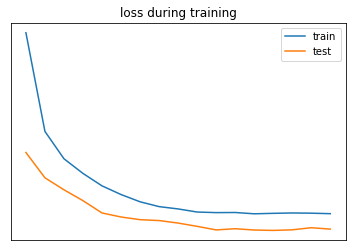

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.yticks([])
plt.xticks([])
plt.title("loss during training")
plt.show()

In [28]:
x_test

array([[[0.25252525, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.22222222, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.1969697 , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        ...,
        [0.23737374, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.23232323, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.23232323, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.22222222, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.1969697 , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.2020202 , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        ...,
        [0.23232323, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.2

In [29]:
#scale back the prediction to orginal scale
y_pred = model.predict(x_test)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[2]*x_test.shape[1])

#Concatenating prediction with 7 columns of the x_test to allow for scaling back to original range of data
#scaler only takes an input which is 8 columns
inv_new = np.concatenate( (y_pred, x_test[:,-7:] ) , axis =1)
#We now transform the inv_new back to the original scale
inv_new = scaler.inverse_transform(inv_new)
#This is us slicing the array and using only the blood sugar reading for the final predictions
final_pred = inv_new[:,0]

#reshaping the y_test into an array of (8724,1)
y_test = y_test.reshape( len(y_test), 1)

#The exact same process as above except we are transforming the validation (actual) data
inv_new = np.concatenate( (y_test, x_test[:,-7:] ) ,axis = 1)
inv_new = scaler.inverse_transform(inv_new)
actual_pred = inv_new[:,0]

In [30]:
actual_pred.shape

(8352,)

In [31]:
final_pred.shape

(8352,)

In [33]:
final_pred = np.round_(final_pred, decimals=1, out = None)

In [34]:
final_pred

array([7.3, 7.5, 7.4, ..., 6. , 6. , 5.8])

In [35]:
bg_pred = pd.DataFrame(final_pred)
bg_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 1 columns):
0    8352 non-null float64
dtypes: float64(1)
memory usage: 65.3 KB


In [36]:
bg_actual = pd.DataFrame(actual_pred)
bg_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 1 columns):
0    8352 non-null float64
dtypes: float64(1)
memory usage: 65.3 KB


In [37]:
bg_actual

0
0      7.4
1      7.4
2      7.5
3      7.6
4      7.7
5      7.8
6      7.8
7      7.9
8      8.1
9      8.4
10     8.6
11     8.8
12     9.0
13     9.9
14     9.8
15     9.6
16     9.5
17     9.6
18     9.7
19     9.8
20     9.7
21     9.6
22     9.6
23     9.5
24     9.9
25    10.3
26    11.0
27    11.1
28    11.1
29    11.2
...    ...
8322  10.9
8323  11.0
8324  11.2
8325  10.1
8326  10.1
8327  10.2
8328   9.9
8329   9.7
8330   9.4
8331   9.5
8332   9.5
8333   9.6
8334   9.9
8335  10.3
8336  10.6
8337  10.8
8338  11.1
8339  11.3
8340  11.1
8341  10.8
8342  10.6
8343   9.1
8344   8.6
8345   8.1
8346   7.6
8347   7.0
8348   6.5
8349   6.3
8350   6.1
8351   5.9

[8352 rows x 1 columns]

In [38]:
bg_pred

0
0      7.3
1      7.5
2      7.4
3      7.6
4      7.6
5      7.7
6      7.8
7      7.7
8      7.9
9      8.1
10     8.5
11     8.7
12     8.9
13     9.1
14    10.4
15     9.7
16     9.3
17     9.3
18     9.6
19     9.7
20     9.8
21     9.6
22     9.4
23     9.5
24     9.3
25    10.1
26    10.5
27    11.4
28    11.1
29    11.0
...    ...
8322  10.8
8323  10.7
8324  11.1
8325  11.4
8326   9.4
8327  10.0
8328  10.3
8329   9.7
8330   9.5
8331   9.4
8332   9.5
8333   9.5
8334   9.7
8335  10.1
8336  10.6
8337  10.8
8338  10.9
8339  11.3
8340  11.5
8341  11.0
8342  10.6
8343  10.4
8344   8.1
8345   8.1
8346   7.8
8347   7.2
8348   6.5
8349   6.0
8350   6.0
8351   5.8

[8352 rows x 1 columns]

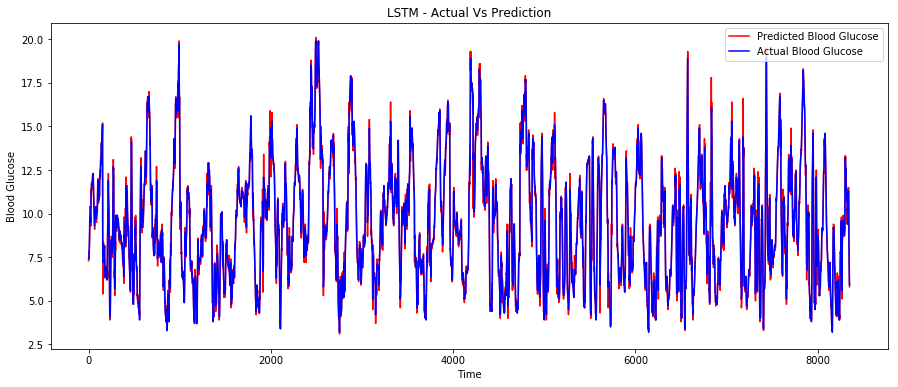

In [39]:
# Visualising the results
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.plot(bg_pred, color = 'red', label = 'Predicted Blood Glucose')
plt.plot(bg_actual, color = 'blue', label = 'Actual Blood Glucose')
plt.title('LSTM - Actual Vs Prediction')
plt.xlabel('Time')
plt.ylabel('Blood Glucose')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
#calculate RMSE
rmse = sqrt(mean_squared_error(final_pred, actual_pred))
print('Validation RMSE: %.4f' % rmse)

Validation RMSE: 0.2925


In [41]:
from keras.models import load_model

model.save('my_24hourlstm_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

In [42]:
#Value closer to one is better
from sklearn.metrics import explained_variance_score
explained_variance_score(bg_pred[0], bg_actual[0])   

0.9921806588862462